In [2]:
import pandas as pd

df = pd.read_csv("../data/analyzed_reviews_20251129_215241.csv")


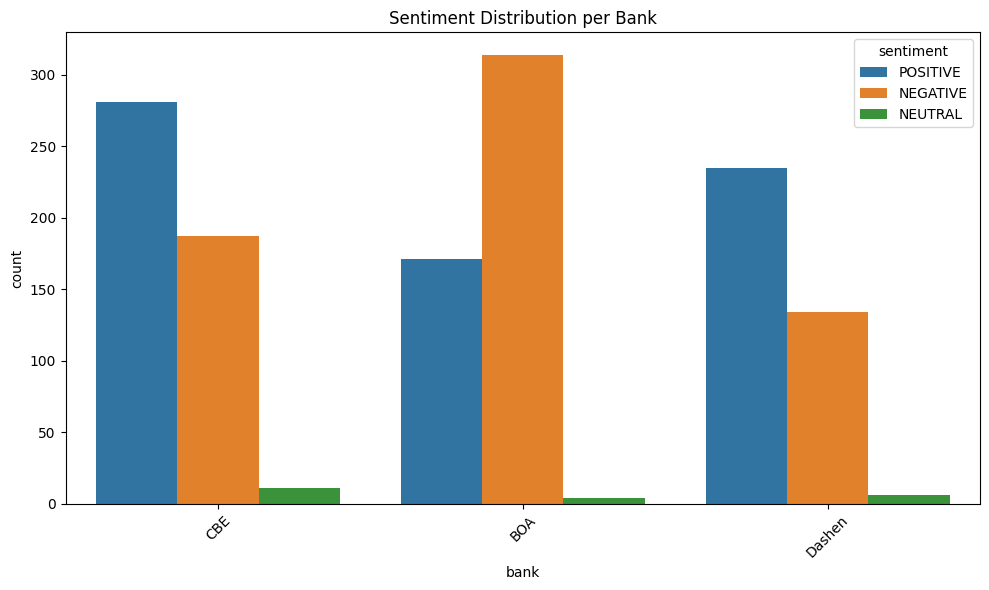

In [ ]:
#Sentiment Distribution per Bank
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, x="bank", hue="sentiment")
plt.title("Sentiment Distribution per Bank")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


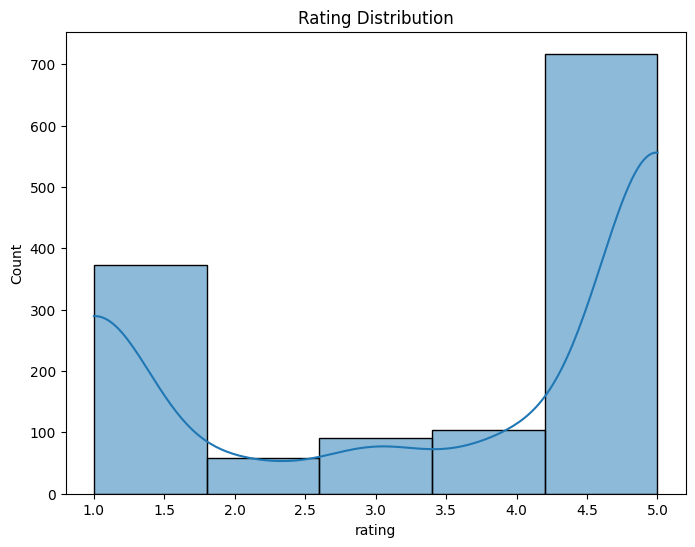

In [5]:
#Rating Distribution
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="rating", kde=True, bins=5)
plt.title("Rating Distribution")
plt.show()


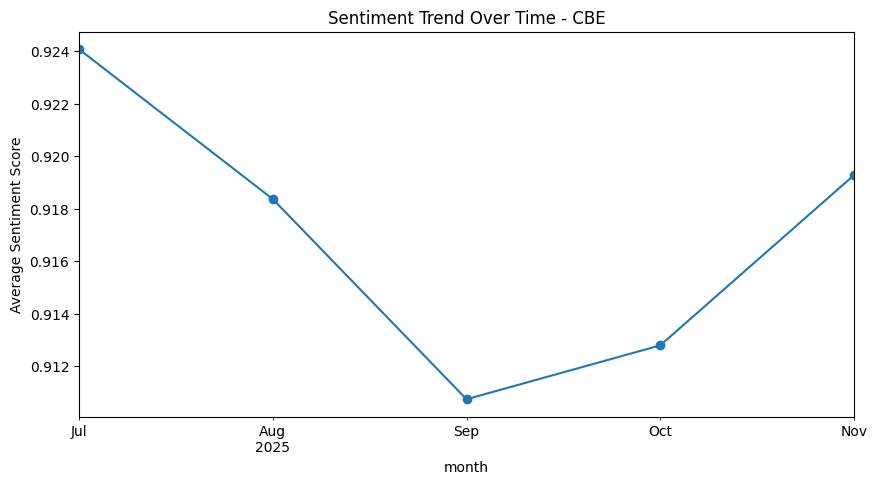

In [6]:
#Sentiment Trend Over Time (per bank)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')

bank = "CBE"
temp = df[df['bank'] == bank]
trend = temp.groupby('month')['sentiment_score'].mean()

trend.plot(figsize=(10,5), marker='o')
plt.title(f"Sentiment Trend Over Time - {bank}")
plt.ylabel("Average Sentiment Score")
plt.show()


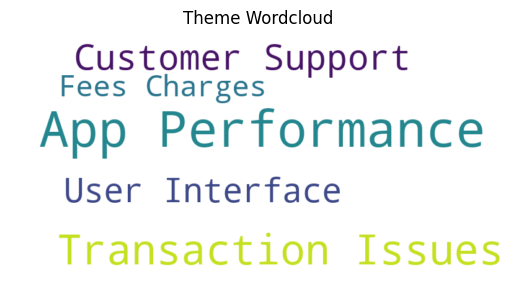

In [ ]:
#theme wordcloud
from wordcloud import WordCloud

all_words = " ".join([" ".join(t) for t in df['themes']])
wc = WordCloud(width=800, height=400, background_color="white").generate(all_words)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Theme Wordcloud")
plt.show()


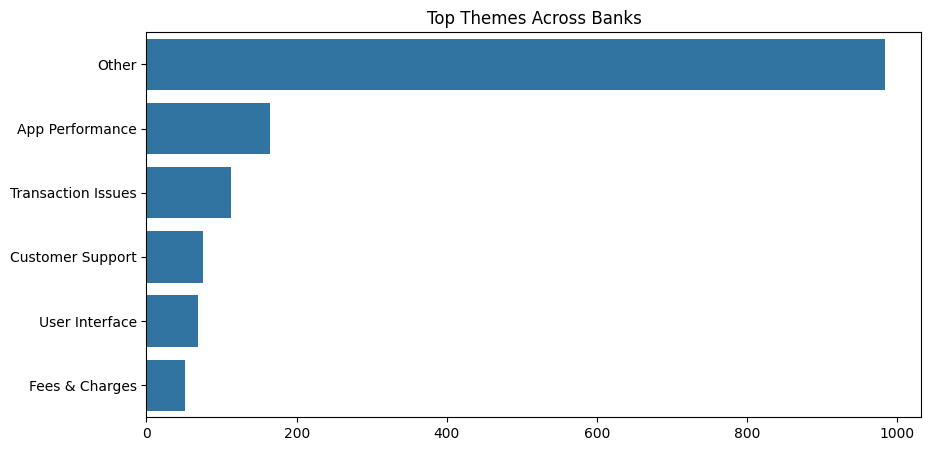

In [8]:
#Top Themes Barplot
themes = [t for sub in df['themes'] for t in sub]
freq = Counter(themes)
top_freq = dict(freq.most_common(10))

plt.figure(figsize=(10,5))
sns.barplot(x=list(top_freq.values()), y=list(top_freq.keys()))
plt.title("Top Themes Across Banks")
plt.show()

In [13]:
ratings = df.groupby('bank')['rating'].mean().sort_values(ascending=False)
sentiment = df.groupby('bank')['sentiment_score'].mean()
print(ratings)
print(sentiment)


bank
CBE       3.972860
Dashen    3.962667
BOA       2.809816
Name: rating, dtype: float64
bank
BOA       0.931098
CBE       0.916650
Dashen    0.930323
Name: sentiment_score, dtype: float64


Recommendations 

⭐ CBE – Recommendations

Improve app loading time during peak hours.

Add more personal finance features (budgeting, spending summary).

⭐ BOA – Recommendations

Fix frequent crashes during login.

Make navigation simpler for new users.

Ethics & Bias Notes

Customer reviews may contain bias. The dataset may over-represent dissatisfied users, as negative experiences often motivate reviews more strongly than positive experiences.